In [1]:
import pandas as pd

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer



In [21]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
df=pd.read_csv('StructredPMBOOK.csv')
df.head()

,number of chapter,chapter,Number of Process,concept,Number of title,titles,Number of subtitle,subtitle,type,content,Definition,REF
0,11,PROJECT RISK MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,"['Figure 11', 'Figure 11']"
1,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,NaN,NaN,NaN,NaN,NaN,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in..."
2,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,NaN,NaN,INPUTS,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in..."
3,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.1,11.1.1.1 PROJECT CHARTER\n,INPUTS,11.1.1.1 PROJECT CHARTER\n\nDescribed in Secti...,11.1.1.1 PROJECT CHARTER\n\n\n\nlevel requirem...,"['Described in Section 4.1.3.1', 'Described in..."
4,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.2,11.1.1.2 PROJECT MANAGEMENT PLAN\n,INPUTS,11.1.1.2 PROJECT MANAGEMENT PLAN\n\nDescribed ...,11.1.1.2 PROJECT MANAGEMENT PLAN\n\n\nshould b...,['Described in Section 4.2.3.1']


In [95]:
def clean_text(text):
    #lowercase
    text = text.lower()

    # remove square brackets
    text = re.sub(r'\[.*?\]', '', text)

    #remove URLs and links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # other html tags
    text = re.sub(r'<.*?>', '', text)

    # non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Remove words containing numbers
    words = [word for word in words if not any(char.isdigit() for char in word)]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

In [96]:
df['preprocessed_content'] = df['content'].apply(lambda x : clean_text(x))
df

,number of chapter,chapter,Number of Process,concept,Number of title,titles,Number of subtitle,subtitle,type,content,Definition,REF,preprocessed_content
0,11,PROJECT RISK MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,"['Figure 11', 'Figure 11']",project risk management project risk managemen...
1,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,NaN,NaN,NaN,NaN,NaN,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...
2,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,NaN,NaN,INPUTS,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...
3,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.1,11.1.1.1 PROJECT CHARTER\n,INPUTS,11.1.1.1 PROJECT CHARTER\n\nDescribed in Secti...,11.1.1.1 PROJECT CHARTER\n\n\n\nlevel requirem...,"['Described in Section 4.1.3.1', 'Described in...",project charter described section project char...
4,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.2,11.1.1.2 PROJECT MANAGEMENT PLAN\n,INPUTS,11.1.1.2 PROJECT MANAGEMENT PLAN\n\nDescribed ...,11.1.1.2 PROJECT MANAGEMENT PLAN\n\n\nshould b...,['Described in Section 4.2.3.1'],project management plan described section plan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.1,11.7.3.1 WORK PERFORMANCE INFORMATION\n,OUTPUTS,11.7.3.1 WORK PERFORMANCE INFORMATION\n\nDescr...,11.7.3.1 WORK PERFORMANCE INFORMATION\n\n\nis ...,"['Described in Section 4.5.1.3', 'Described in...",work performance information described section...
106,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.2,11.7.3.2 CHANGE REQUESTS\n,OUTPUTS,11.7.3.2 CHANGE REQUESTS\n\nDescribed in Secti...,11.7.3.2 CHANGE REQUESTS\n\n\nbaselines or oth...,"['Described in Section 4.3.3.4', 'Described in...",change requests described section monitor risk...
107,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.3,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n,OUTPUTS,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,"['Described in Section 4.1.3.2', 'Described in...",project management plan updates change project...
108,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.4,11.7.3.4 PROJECT DOCUMENTS UPDATES\n,OUTPUTS,11.7.3.4 PROJECT DOCUMENTS UPDATES\n\nProject ...,11.7.3.4 PROJECT DOCUMENTS UPDATES\n\nProject ...,"['Described in Section 4.1.3.2', 'Described in...",project documents updates project documents ma...


In [97]:
df['tokens'] = df['preprocessed_content'].apply(word_tokenize)
df

,number of chapter,chapter,Number of Process,concept,Number of title,titles,Number of subtitle,subtitle,type,content,Definition,REF,preprocessed_content,tokens
0,11,PROJECT RISK MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,"['Figure 11', 'Figure 11']",project risk management project risk managemen...,"[project, risk, management, project, risk, man..."
1,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,NaN,NaN,NaN,NaN,NaN,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen..."
2,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,NaN,NaN,INPUTS,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen..."
3,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.1,11.1.1.1 PROJECT CHARTER\n,INPUTS,11.1.1.1 PROJECT CHARTER\n\nDescribed in Secti...,11.1.1.1 PROJECT CHARTER\n\n\n\nlevel requirem...,"['Described in Section 4.1.3.1', 'Described in...",project charter described section project char...,"[project, charter, described, section, project..."
4,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.2,11.1.1.2 PROJECT MANAGEMENT PLAN\n,INPUTS,11.1.1.2 PROJECT MANAGEMENT PLAN\n\nDescribed ...,11.1.1.2 PROJECT MANAGEMENT PLAN\n\n\nshould b...,['Described in Section 4.2.3.1'],project management plan described section plan...,"[project, management, plan, described, section..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.1,11.7.3.1 WORK PERFORMANCE INFORMATION\n,OUTPUTS,11.7.3.1 WORK PERFORMANCE INFORMATION\n\nDescr...,11.7.3.1 WORK PERFORMANCE INFORMATION\n\n\nis ...,"['Described in Section 4.5.1.3', 'Described in...",work performance information described section...,"[work, performance, information, described, se..."
106,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.2,11.7.3.2 CHANGE REQUESTS\n,OUTPUTS,11.7.3.2 CHANGE REQUESTS\n\nDescribed in Secti...,11.7.3.2 CHANGE REQUESTS\n\n\nbaselines or oth...,"['Described in Section 4.3.3.4', 'Described in...",change requests described section monitor risk...,"[change, requests, described, section, monitor..."
107,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.3,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n,OUTPUTS,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,"['Described in Section 4.1.3.2', 'Described in...",project management plan updates change project...,"[project, management, plan, updates, change, p..."
108,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.4,11.7.3.4 PROJECT DOCUMENTS UPDATES\n,OUTPUTS,11.7.3.4 PROJECT DOCUMENTS UPDATES\n\nProject ...,11.7.3.4 PROJECT DOCUMENTS UPDATES\n\nProject ...,"['Described in Section 4.1.3.2', 'Described in...",project documents updates project documents ma...,"[project, documents, updates, project, documen..."


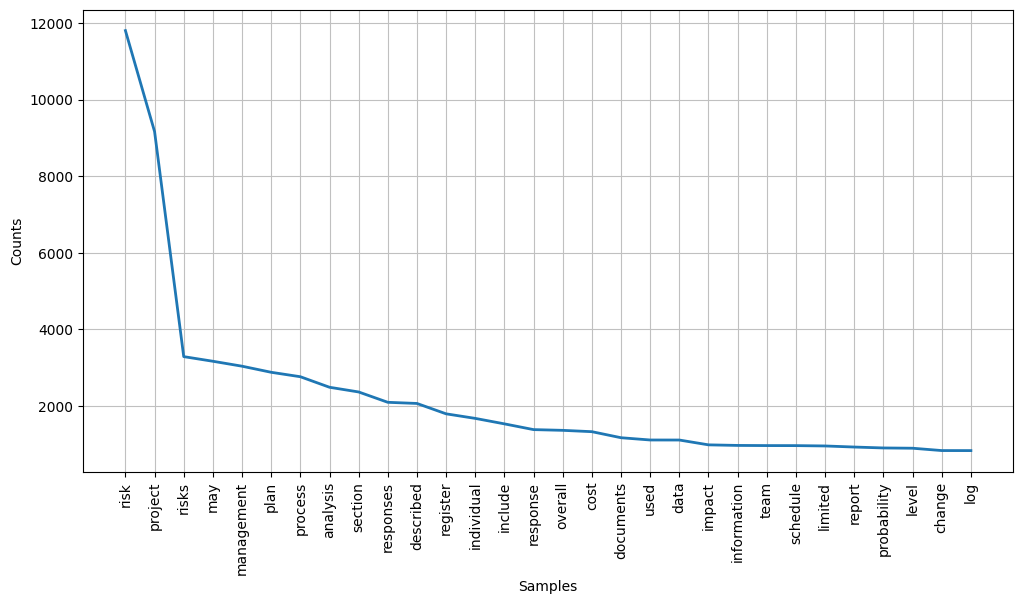

In [98]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

synonyms_flat = [word for sublist in df['tokens'] for word in sublist]

word_freq = FreqDist(synonyms_flat)

plt.figure(figsize=(12, 6))

word_freq.plot(30, cumulative=False)

plt.show()

In [99]:
##synonyms

In [100]:
def find_synonyms(word_list):
    synonyms = []

    lemmatizer = WordNetLemmatizer()

    for word in word_list:
        lemmatized_word = lemmatizer.lemmatize(word.lower())

        synsets = wordnet.synsets(lemmatized_word)
        for synset in synsets:
            synonyms.extend(synset.lemma_names())

    return list(set(synonyms))

df['synonyms'] = df['tokens'].apply(find_synonyms)

df


,number of chapter,chapter,Number of Process,concept,Number of title,titles,Number of subtitle,subtitle,type,content,Definition,REF,preprocessed_content,tokens,synonyms
0,11,PROJECT RISK MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,"['Figure 11', 'Figure 11']",project risk management project risk managemen...,"[project, risk, management, project, risk, man...","[fulfill, ramp_up, fall_out, stand_for, enjoym..."
1,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,NaN,NaN,NaN,NaN,NaN,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen...","[fulfill, harbour, fall_out, invite, reservati..."
2,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,NaN,NaN,INPUTS,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen...","[fulfill, harbour, fall_out, invite, reservati..."
3,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.1,11.1.1.1 PROJECT CHARTER\n,INPUTS,11.1.1.1 PROJECT CHARTER\n\nDescribed in Secti...,11.1.1.1 PROJECT CHARTER\n\n\n\nlevel requirem...,"['Described in Section 4.1.3.1', 'Described in...",project charter described section project char...,"[project, charter, described, section, project...","[contain, consistent, prerequisite, rank, show..."
4,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.2,11.1.1.2 PROJECT MANAGEMENT PLAN\n,INPUTS,11.1.1.2 PROJECT MANAGEMENT PLAN\n\nDescribed ...,11.1.1.2 PROJECT MANAGEMENT PLAN\n\n\nshould b...,['Described in Section 4.2.3.1'],project management plan described section plan...,"[project, management, plan, described, section...","[contain, consistent, rank, show, cock, consid..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.1,11.7.3.1 WORK PERFORMANCE INFORMATION\n,OUTPUTS,11.7.3.1 WORK PERFORMANCE INFORMATION\n\nDescr...,11.7.3.1 WORK PERFORMANCE INFORMATION\n\n\nis ...,"['Described in Section 4.5.1.3', 'Described in...",work performance information described section...,"[work, performance, information, described, se...","[monitor_lizard, disciplinary, fulfill, solve,..."
106,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.2,11.7.3.2 CHANGE REQUESTS\n,OUTPUTS,11.7.3.2 CHANGE REQUESTS\n\nDescribed in Secti...,11.7.3.2 CHANGE REQUESTS\n\n\nbaselines or oth...,"['Described in Section 4.3.3.4', 'Described in...",change requests described section monitor risk...,"[change, requests, described, section, monitor...","[monitor_lizard, disciplinary, fulfill, contai..."
107,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.3,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n,OUTPUTS,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,"['Described in Section 4.1.3.2', 'Described in...",project management plan updates change project...,"[project, management, plan, updates, change, p...","[monitor_lizard, contain, scrutinise, show, ac..."
108,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.4,11.7.3.4 PROJECT DOCUMENTS UPDATES\n,OUTPUTS,11.7.3.4 PROJECT DOCUMENTS UPDATES\n\nProject ...,11.7.3.4 PROJECT DOCUMENTS UPDATES\n\nProject ...,"['Described in Section 4.1.3.2', 'Described in...",project documents updates project documents ma...,"[project, documents, updates, project, documen...","[monitor_lizard, contain, s

In [101]:
def find_synonyms(word_list):
    synonyms_dict = {}

    lemmatizer = WordNetLemmatizer()

    for words in word_list:
        for word in words:
            lemmatized_word = lemmatizer.lemmatize(word.lower())
            synsets = wordnet.synsets(lemmatized_word)
            synonyms = []
            for synset in synsets:
                synonyms.extend(synset.lemma_names())
            synonyms_dict[word] = list(set(synonyms))

    return synonyms_dict

synonyms_result = find_synonyms(df['synonyms'])
for word, synonyms in synonyms_result.items():
    print(f'{word}: {synonyms}')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
cohesion: ['cohesion', 'cohesiveness', 'coherence', 'coherency']
care_for: ['care_for', 'hold_dear', 'cherish', 'treat', 'treasure']
identification_number: ['number', 'identification_number']
lodge: ['hostel', 'order', 'lodge', 'Sir_Oliver_Lodge', 'wedge', 'hunting_lodge', 'inn', 'accommodate', 'file', 'hostelry', 'club', 'society', 'deposit', 'gild', 'guild', 'auberge', 'Sir_Oliver_Joseph_Lodge', 'stick', 'social_club', 'Lodge', 'charge', 'indian_lodge']
coping: ['apprehend', 'arrest', 'cope', 'coping', 'knock_off', 'pick_up', 'collar', 'header', 'contend', 'deal', 'manage', 'make_do', 'nail', 'cop', 'thieve', 'get_by', 'make_out', 'grapple', 'snitch', 'hook', 'nab', 'glom']
get_going: ['get_weaving', 'get_rolling', 'go', 'get_going', 'bestir_oneself', 'get_cracking', 'get_started', 'get_moving', 'start']
marketer: ['vendor', 'marketer', 'trafficker', 'seller', 'vender']
degenerate: ['deviate', 'fast', 'riot

In [102]:
stop_words = set(stopwords.words('english'))

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
df['keywords'] = df['preprocessed_content'].apply(clean_text)
count = CountVectorizer()
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
count.fit(df['keywords'])

for i in range(len(df['keywords'])):
    word_count = count.transform([df['keywords'][i]])
    tfidf_transformer.fit(word_count)

    tf_idf_vector = tfidf_transformer.transform(word_count)
    feature_names = count.get_feature_names_out()

    first_document_vector = tf_idf_vector[0]
    df_tfifd = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])

    tf_idf = df_tfifd.sort_values(by=["tfidf"], ascending=False)
    tf_idf = tf_idf[tf_idf["tfidf"] != 0.0]

    # Create a new column to store the TF-IDF features for each row
    df['keywords'][i] = tf_idf.index.tolist()


<ipython-input-103-e598f110f468>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'][i] = tf_idf.index.tolist()
<ipython-input-103-e598f110f468>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'][i] = tf_idf.index.tolist()
<ipython-input-103-e598f110f468>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'][i] = tf_idf.index.tolist()
<ipython-input-103-e598f110f468>:21: SettingWithCopyWarning: 
A 

In [104]:
df

,number of chapter,chapter,Number of Process,concept,Number of title,titles,Number of subtitle,subtitle,type,content,Definition,REF,preprocessed_content,tokens,synonyms,keywords
0,11,PROJECT RISK MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,"['Figure 11', 'Figure 11']",project risk management project risk managemen...,"[project, risk, management, project, risk, man...","[fulfill, ramp_up, fall_out, stand_for, enjoym...","[project, risk, management, risks, process, pl..."
1,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,NaN,NaN,NaN,NaN,NaN,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen...","[fulfill, harbour, fall_out, invite, reservati...","[risk, project, management, plan, process, imp..."
2,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,NaN,NaN,INPUTS,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen...","[fulfill, harbour, fall_out, invite, reservati...","[risk, project, management, plan, process, imp..."
3,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.1,11.1.1.1 PROJECT CHARTER\n,INPUTS,11.1.1.1 PROJECT CHARTER\n\nDescribed in Secti...,11.1.1.1 PROJECT CHARTER\n\n\n\nlevel requirem...,"['Described in Section 4.1.3.1', 'Described in...",project charter described section project char...,"[project, charter, described, section, project...","[contain, consistent, prerequisite, rank, show...","[project, risk, management, plan, section, pro..."
4,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.2,11.1.1.2 PROJECT MANAGEMENT PLAN\n,INPUTS,11.1.1.2 PROJECT MANAGEMENT PLAN\n\nDescribed ...,11.1.1.2 PROJECT MANAGEMENT PLAN\n\n\nshould b...,['Described in Section 4.2.3.1'],project management plan described section plan...,"[project, management, plan, described, section...","[contain, consistent, rank, show, cock, consid...","[risk, management, project, plan, process, lim..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.1,11.7.3.1 WORK PERFORMANCE INFORMATION\n,OUTPUTS,11.7.3.1 WORK PERFORMANCE INFORMATION\n\nDescr...,11.7.3.1 WORK PERFORMANCE INFORMATION\n\n\nis ...,"['Described in Section 4.5.1.3', 'Described in...",work performance information described section...,"[work, performance, information, described, se...","[monitor_lizard, disciplinary, fulfill, solve,...","[risk, project, risks, process, may, section, ..."
106,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.2,11.7.3.2 CHANGE REQUESTS\n,OUTPUTS,11.7.3.2 CHANGE REQUESTS\n\nDescribed in Secti...,11.7.3.2 CHANGE REQUESTS\n\n\nbaselines or oth...,"['Described in Section 4.3.3.4', 'Described in...",change requests described section monitor risk...,"[change, requests, described, section, monitor...","[monitor_lizard, disciplinary, fulfill, contai...","[risk, project, risks, process, may, change, s..."
107,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.3,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n,OUTPUTS,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,"['Described in Section 4.1.3.2', 'Described in...",project management plan updates change project...,"[project, management, plan, updates, change, p...","[monitor_lizard, contain, scrutinise, show, ac...","[risk, risks, process, project, may, updat

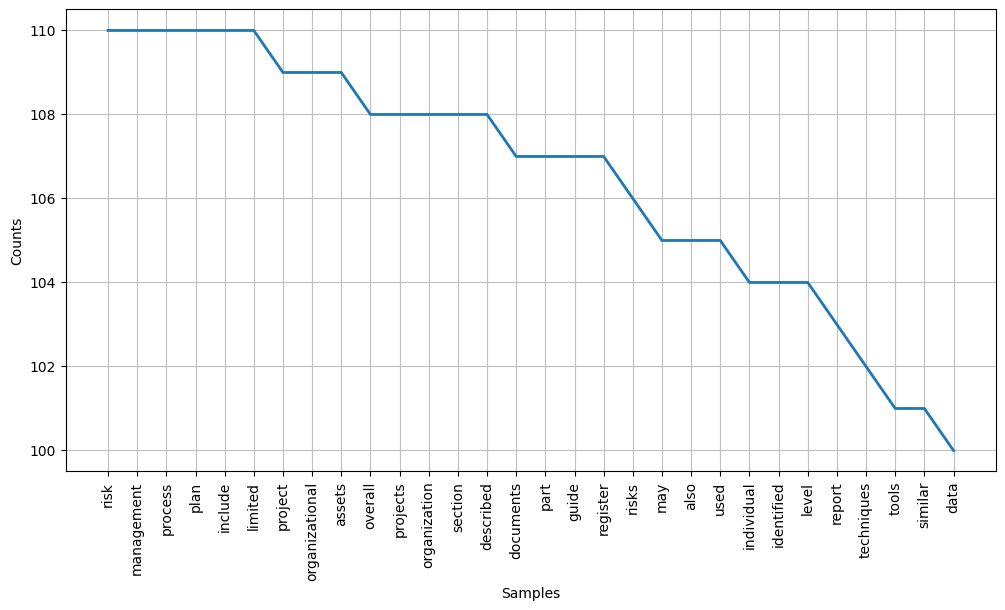

In [105]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

synonyms_flat = [word for sublist in df['keywords'] for word in sublist]

word_freq = FreqDist(synonyms_flat)

plt.figure(figsize=(12, 6))

word_freq.plot(30, cumulative=False)

plt.show()

In [108]:
nltk.download('conll2000')
from nltk.corpus import conll2000
from nltk.chunk import ChunkParserI
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk.util import conlltags2tree, tree2conlltags

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


In [109]:

# Function to convert chunked sentences to CoNLL format
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

# Function to combine multiple taggers into a backoff tagging system
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

# Define the chunker class
class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences, tagger_classes=[UnigramTagger, BigramTagger]):
        train_sent_tags = conll_tag_chunks(train_sentences)
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        pos_tags = [tag for word, tag in tagged_sentence]
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag) in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)


In [114]:
# Load the CoNLL 2000 corpus
data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:]

# Function to train a chunker model
def train_chunker_model(train_data):
    train_conll = [tree2conlltags(tree) for tree in train_data]
    train_trees = [conlltags2tree(conll) for conll in train_conll]
    return NGramTagChunker(train_trees)

# Train the chunker model
chunker = train_chunker_model(train_data)

print(chunker.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


<ipython-input-114-6f158c342072>:15: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  print(chunker.evaluate(test_data))


In [126]:
def get_the_right_chunking(chunk_tree):
    # Iterate through the elements in reverse order
    for i in range(len(chunk_tree) - 1, 0, -1):
        # Check if the element is a tuple (sub-tree)
        if isinstance(chunk_tree[i], tuple):
            # Remove the sub-tree element
            del chunk_tree[i]
        else:
            # If the first non-tuple element is found, stop iterating
            break

    return chunk_tree

In [117]:
# Specify the file path
file_path = "realoutput.txt"  # Replace with the path to your text file

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the contents of the file
    text = file.read()

# Print or process the file contents
print(text)

PROJECT RISK MANAGEMENT

Project Risk Management includes the processes of conducting risk management planning, identification, analysis,
response planning, response implementation, and monitoring risk on a project. The objectives of project risk management
are to increase the probability and/or impact of positive risks and to decrease the probability and/or impact of negative
risks, in order to optimize the chances of project success.

The Project Risk Management processes are:
11.1 Plan Risk Management—The process of defining how to conduct risk management activities for a project.

11.2 Identify Risks—tThe process of identifying individual project risks as well as sources of overall project risk,
and documenting their characteristics.

11.3 Perform Qualitative Risk Analysis—The process of prioritizing individual project risks for further analysis
or action by assessing their probability of occurrence and impact as well as other characteristics.

11.4 Perform Quantitative Risk Analys

In [119]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [122]:
nltk_pos_tagged = nltk.pos_tag(text.split())
chunk_tree = chunker.parse(nltk_pos_tagged)

In [124]:
print(chunk_tree)

(S
  (NP
    PROJECT/NN
    RISK/NNP
    MANAGEMENT/NNP
    Project/NNP
    Risk/NNP
    Management/NNP)
  (VP includes/VBZ)
  (NP the/DT processes/NNS)
  (PP of/IN)
  (VP conducting/VBG)
  (NP
    risk/NN
    management/NN
    planning,/NN
    identification,/NN
    analysis,/NN
    response/NN
    planning,/NN
    response/NN
    implementation,/NN)
  and/CC
  (NP monitoring/NN risk/NN)
  (PP on/IN)
  (NP a/DT project./NN)
  (NP The/DT objectives/NNS)
  (PP of/IN)
  (NP project/NN risk/NN management/NN)
  (VP are/VBP to/TO increase/VB)
  (NP the/DT probability/NN and/or/JJ impact/NN)
  (PP of/IN)
  (NP positive/JJ risks/NNS)
  and/CC
  (VP to/TO decrease/VB)
  (NP the/DT probability/NN and/or/JJ impact/NN)
  (PP of/IN)
  (NP negative/JJ risks,/NN)
  (PP in/IN)
  (NP order/NN)
  (VP to/TO optimize/VB)
  (NP the/DT chances/NNS)
  (PP of/IN)
  (NP project/NN)
  (VP success./VBZ)
  (NP The/DT Project/NN Risk/NNP Management/NNP)
  (VP processes/VBZ are:/RB)
  (NP 11.1/CD Plan/NN Risk/NNP 

In [128]:
chunk_tree = get_the_right_chunking(chunk_tree)

In [135]:
NP1 = []
VB = []
NP2 = []
keywords = []

for i in range(len(chunk_tree)):
    # Check if the element is an NLTK tree
    if isinstance(chunk_tree[i], nltk.Tree):
        if chunk_tree[i].label() == 'NP':
            keywords.append(' '.join(word for word, pos in chunk_tree[i].leaves()))

    if i == (len(chunk_tree) - 3):
        np1 = chunk_tree[-3]
        vb = chunk_tree[-2]
        np2 = chunk_tree[-1]

        if (isinstance(np1, nltk.Tree) and np1.label() == 'NP' and
            isinstance(vb, nltk.Tree) and vb.label() == 'VP' and
            isinstance(np2, nltk.Tree) and np2.label() == 'NP'):

            t1 = ' '.join(word for word, pos in np1.leaves())
            NP1.append(t1)
            t2 = ' '.join(word for word, pos in vb.leaves())
            VB.append(t2)
            t3 = ' '.join(word for word, pos in np2.leaves())
            NP2.append(t3)
            break
        else:
            break
    elif (isinstance(chunk_tree[i], nltk.Tree) and chunk_tree[i].label() == 'NP' and
          isinstance(chunk_tree[i+1], nltk.Tree) and chunk_tree[i+1].label() == 'VP' and
          isinstance(chunk_tree[i+2], nltk.Tree) and chunk_tree[i+2].label() == 'NP'):

        np1 = chunk_tree[i]
        vb = chunk_tree[i+1]
        np2 = chunk_tree[i+2]

        t1 = ' '.join(word for word, pos in np1.leaves())
        NP1.append(t1)
        t2 = ' '.join(word for word, pos in vb.leaves())
        VB.append(t2)
        t3 = ' '.join(word for word, pos in np2.leaves())
        NP2.append(t3)


In [137]:
df_relation = pd.DataFrame(list(zip(NP1,VB,NP2)),columns=['noun','verb','compliment'])
df_relation

,noun,verb,compliment
0,PROJECT RISK MANAGEMENT Project Risk Management,includes,the processes
1,project risk management,are to increase,the probability and/or impact
2,order,to optimize,the chances
3,project,success.,The Project Risk Management
4,The Project Risk Management,processes are:,11.1 Plan Risk Management—The process
...,...,...,...
1238,the risk report,is updated to reflect,the current status
1239,overall project,risk.,The risk report
1240,The risk report,may also include,details
1241,the top individual project,"risks,",agreed-


In [138]:
def find_synonyms(word_list):
    synonyms = []

    lemmatizer = WordNetLemmatizer()

    for word in word_list:
        lemmatized_word = lemmatizer.lemmatize(word.lower())

        synsets = wordnet.synsets(lemmatized_word)
        for synset in synsets:
            synonyms.extend(synset.lemma_names())

    return list(set(synonyms))

In [140]:
df_relation['noun_synonyms'] = df_relation['noun'].apply(find_synonyms)
df_relation['verb_synonyms'] = df_relation['verb'].apply(find_synonyms)
df_relation['compliment_synonyms'] = df_relation['compliment'].apply(find_synonyms)

In [141]:
df_relation

,noun,verb,compliment,noun_synonyms,verb_synonyms,compliment_synonyms
0,PROJECT RISK MANAGEMENT Project Risk Management,includes,the processes,"[angstrom, tocopherol, iodine, super_acid, rad...","[tocopherol, iodine, cubic_decimeter, litre, u...","[tocopherol, radius, heat_content, roentgen, c..."
1,project risk management,are to increase,the probability and/or impact,"[angstrom, tocopherol, iodine, super_acid, rad...","[angstrom, tocopherol, iodine, radius, roentge...","[angstrom, tocopherol, iodine, cubic_decimeter..."
2,order,to optimize,the chances,"[vitamin_E, tocopherol, radius, ergocalciferol...","[vitamin_E, M, iodine, tocopherol, tonne, k, y...","[angstrom, tocopherol, heat_content, c, due_ea..."
3,project,success.,The Project Risk Management,"[vitamin_E, tocopherol, tonne, radius, coulomb...","[vitamin_E, tocopherol, coulomb, u, s, uranium...","[angstrom, tocopherol, iodine, super_acid, rad..."
4,The Project Risk Management,processes are:,11.1 Plan Risk Management—The process,"[angstrom, tocopherol, iodine, super_acid, rad...","[angstrom, tocopherol, radius, roentgen, c, du...","[angstrom, tocopherol, iodine, super_acid, cub..."
...,...,...,...,...,...,...
1238,the risk report,is updated to reflect,the current status,"[tocopherol, iodine, super_acid, radius, heat_...","[angstrom, tocopherol, iodine, cubic_decimeter...","[angstrom, tocopherol, radius, u, heat_content..."
1239,overall project,risk.,The risk report,"[angstrom, tocopherol, cubic_decimeter, radius...","[M, iodine, super_acid, potassium, radius, k, ...","[tocopherol, iodine, super_acid, radius, heat_..."
1240,The risk report,may also include,details,"[tocopherol, iodine, super_acid, radius, heat_...","[angstrom, tocopherol, iodine, cubic_decimeter...","[angstrom, tocopherol, iodine, cubic_decimeter..."
1241,the top individual project,"risks,",agreed-,"[angstrom, tocopherol, iodine, cubic_decimeter...","[M, iodine, super_acid, potassium, radius, k, ...","[angstrom, vitamin_E, M, tocopherol, radius, y..."


In [142]:
df

,number of chapter,chapter,Number of Process,concept,Number of title,titles,Number of subtitle,subtitle,type,content,Definition,REF,preprocessed_content,tokens,synonyms,keywords
0,11,PROJECT RISK MANAGEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,PROJECT RISK MANAGEMENT\n\nProject Risk Manage...,"['Figure 11', 'Figure 11']",project risk management project risk managemen...,"[project, risk, management, project, risk, man...","[fulfill, ramp_up, fall_out, stand_for, enjoym...","[project, risk, management, risks, process, pl..."
1,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,NaN,NaN,NaN,NaN,NaN,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen...","[fulfill, harbour, fall_out, invite, reservati...","[risk, project, management, plan, process, imp..."
2,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,NaN,NaN,INPUTS,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,PLAN RISK MANAGEMENT\n\nPlan Risk Management i...,"['Described in Section 4.1.3.1', 'Described in...",plan risk management plan risk management proc...,"[plan, risk, management, plan, risk, managemen...","[fulfill, harbour, fall_out, invite, reservati...","[risk, project, management, plan, process, imp..."
3,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.1,11.1.1.1 PROJECT CHARTER\n,INPUTS,11.1.1.1 PROJECT CHARTER\n\nDescribed in Secti...,11.1.1.1 PROJECT CHARTER\n\n\n\nlevel requirem...,"['Described in Section 4.1.3.1', 'Described in...",project charter described section project char...,"[project, charter, described, section, project...","[contain, consistent, prerequisite, rank, show...","[project, risk, management, plan, section, pro..."
4,11,PROJECT RISK MANAGEMENT,11.1,PLAN RISK MANAGEMENT\n,11.1.1,PLAN RISK MANAGEMENT: INPUTS\n,11.1.1.2,11.1.1.2 PROJECT MANAGEMENT PLAN\n,INPUTS,11.1.1.2 PROJECT MANAGEMENT PLAN\n\nDescribed ...,11.1.1.2 PROJECT MANAGEMENT PLAN\n\n\nshould b...,['Described in Section 4.2.3.1'],project management plan described section plan...,"[project, management, plan, described, section...","[contain, consistent, rank, show, cock, consid...","[risk, management, project, plan, process, lim..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.1,11.7.3.1 WORK PERFORMANCE INFORMATION\n,OUTPUTS,11.7.3.1 WORK PERFORMANCE INFORMATION\n\nDescr...,11.7.3.1 WORK PERFORMANCE INFORMATION\n\n\nis ...,"['Described in Section 4.5.1.3', 'Described in...",work performance information described section...,"[work, performance, information, described, se...","[monitor_lizard, disciplinary, fulfill, solve,...","[risk, project, risks, process, may, section, ..."
106,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.2,11.7.3.2 CHANGE REQUESTS\n,OUTPUTS,11.7.3.2 CHANGE REQUESTS\n\nDescribed in Secti...,11.7.3.2 CHANGE REQUESTS\n\n\nbaselines or oth...,"['Described in Section 4.3.3.4', 'Described in...",change requests described section monitor risk...,"[change, requests, described, section, monitor...","[monitor_lizard, disciplinary, fulfill, contai...","[risk, project, risks, process, may, change, s..."
107,11,PROJECT RISK MANAGEMENT,11.7,MONITOR RISKS\n,11.7.3,MONITOR RISKS: OUTPUTS\n,11.7.3.3,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n,OUTPUTS,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\n\nAn...,"['Described in Section 4.1.3.2', 'Described in...",project management plan updates change project...,"[project, management, plan, updates, change, p...","[monitor_lizard, contain, scrutinise, show, ac...","[risk, risks, process, project, may, updat

In [143]:
df.to_csv('PMBOOK.CSV', index= False)

In [145]:
df_relation.to_csv('data_relation.CSV', index= False)